In [ ]:
import sys
import os
import jax
import glob
import h5py
import numpy as np
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from HOSim import solver
f_jit = jax.jit(solver.f2d, static_argnums=(2, 3, 4, 5, 6))

y, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None
with h5py.File("..\\output\\simulation_1.h5", "r") as data:
    y = data["y"][100:]
    Hs = data.attrs["Hs"]
    Tp = data.attrs["Tp"]

    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]
    x = np.linspace(0, length, 2*modes)

['..\\output\\simulation_0.h5', '..\\output\\simulation_1.h5', '..\\output\\simulation_2.h5', '..\\output\\simulation_3.h5']


(901, 2, 1024, 513)


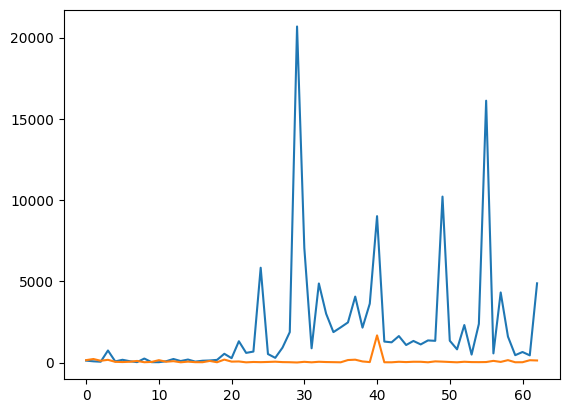

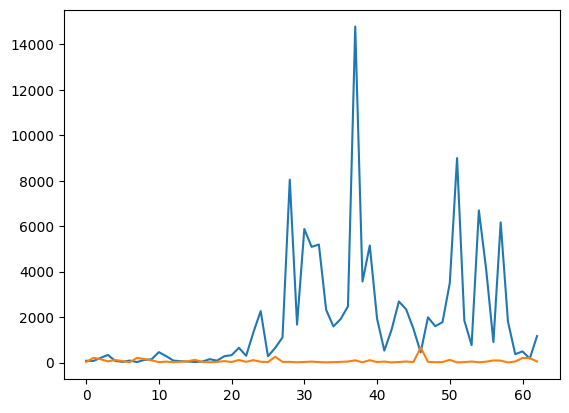

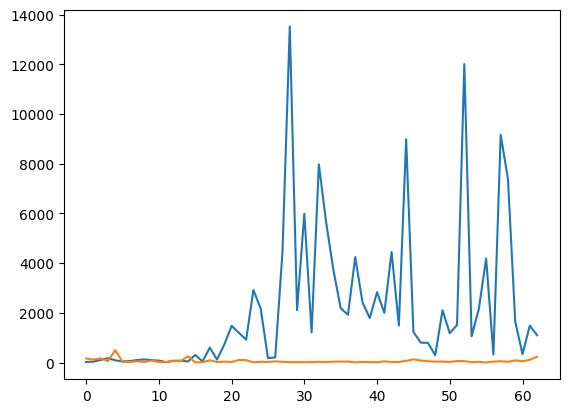

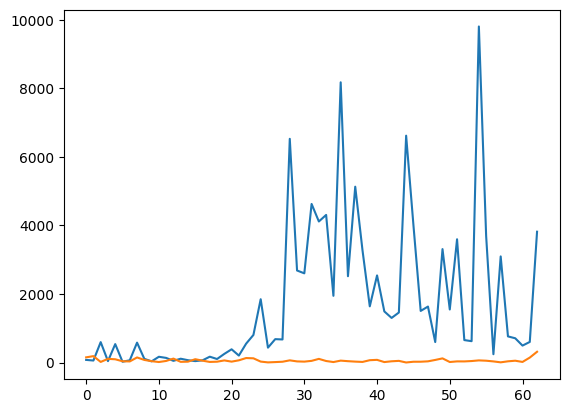

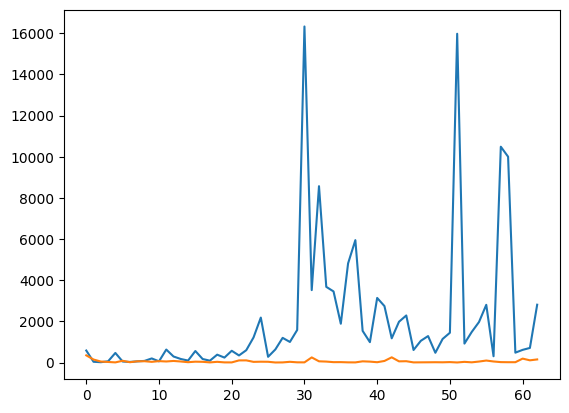

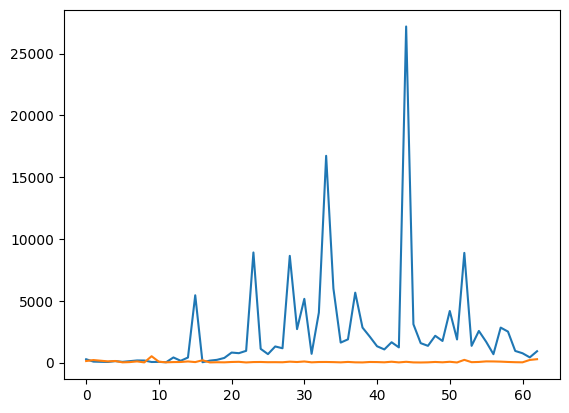

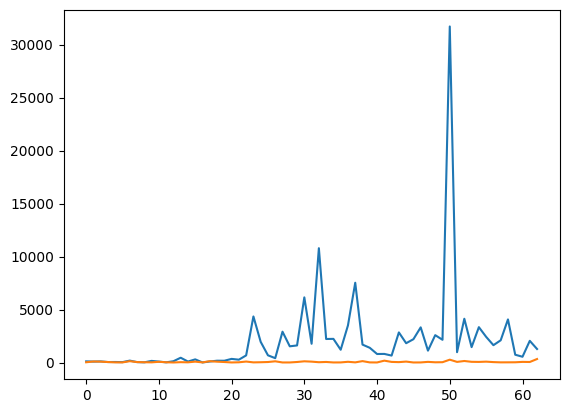

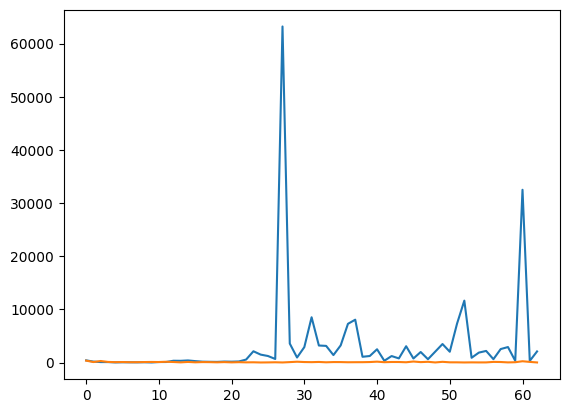

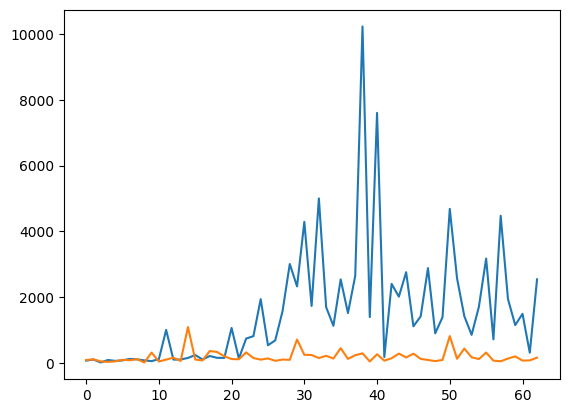

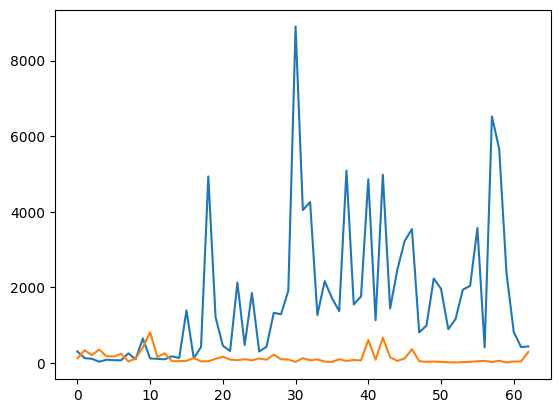

In [29]:
print(y.shape)

# for i in range(10):
#     x1 = y[i]
#     x2 = y[i+1]

#     fx1 = f_jit(200, x1, modes, 9.81, 2*np.pi/length, 8, 0.001)
#     fx2 = f_jit(200, x2, modes, 9.81, 2*np.pi/length, 8, 0.001)

#     K = np.abs(fx1[:, :64, :64]-fx2[:, :64, :64])/np.abs(x1[:, :64, :64]-x2[:, :64, :64])

#     plt.plot(K[0, 0, 1:])
#     plt.plot(K[0, 1:, 0])

epsilon = 10**(-6)
for i in range(10):
    x1 = y[i]
    x2 = x1 + epsilon * (np.random.randn(*x1.shape) + 1j * np.random.randn(*x1.shape))
    
    fx1 = f_jit(200, x1, modes, 9.81, 2*np.pi/length, 8, 0.001)
    fx2 = f_jit(200, x2, modes, 9.81, 2*np.pi/length, 8, 0.001)

    K = np.abs(fx1[:, :64, :64]-fx2[:, :64, :64])/np.abs(x1[:, :64, :64]-x2[:, :64, :64])

    plt.plot(K[0, 0, 1:])
    plt.plot(K[0, 1:, 0])
    plt.show()